In [1]:
# info here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# http://www.smartcomputerlab.org/m6/Lab1.regression.tf.keras.pdf

## Imports

In [2]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning.
import keras as kr
import tensorflow as tf

import numpy as np

## Class: Linear Regression

In [3]:
class LinearRegression:
    
    # Constructor, defining # of epochs here.
    def __init__(self, epoch):
        print(f'Linear Regression model to be created with {epoch} epochs.')
        self.epoch = epoch

    # Loads the data from the file, seperates into X and y.
    def LoadData(self, fname):  
        # Limiting to .3 decimal points.
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        # Reading fname, skipping headings
        self.dataset = np.loadtxt(fname, delimiter=",", skiprows=1)
        # Windspeed data.
        self.X = self.dataset[:,0]
        # Power data.
        self.y = self.dataset[:,1]
        
    # Creates the model.
    def CreateModel(self):
        # Create model.
        from keras.models import Sequential
        from keras.layers import Dense

        thisShape = 1

        self.model = Sequential()
        self.model.add(Dense(12, input_dim=thisShape, activation='relu'))
        self.model.add(Dense(8, activation='relu'))
        self.model.add(Dense(thisShape, activation='relu'))

        # Train model.
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.tf_history = self.model.fit(self.X, self.y, epochs=self.epoch, verbose=True)
        
        # Prediction.
        self.predictions = self.model.predict(self.X)
        
    def PredictPower(self, windspeed):
        speed = [windspeed]
        prediction = self.model.predict(speed)
        print("Power prediction: %.3f" % prediction)
        return prediction
        
    # Displays the model loss.
    def DisplayLoss(self):
        # displayLoss():
        plt.title("Linear Regression")
        plt.plot(self.tf_history.history['loss'], color="red")
        plt.xlabel('Epochs')
        plt.ylabel('loss')
        plt.show()
        
    # Displays the model predictions.
    def DisplayPrediction(self):
        # displayPlot():
        plt.figure(figsize=(12,7))
        plt.title('Results')
        plt.scatter(self.X, self.y, label='Data $(X, y)$')
        plt.plot(self.X, self.predictions, color='red', label='Linear Regression',linewidth=3.0)
        plt.xlabel('$X$', fontsize=20)
        plt.ylabel('$y$', fontsize=20)
        plt.grid(True)
        plt.legend(fontsize=20)
        plt.show()
    

## Class: Polynomial Regression

In [4]:
class PolynomialRegression:
    
    # Constructor, defining # of epochs and poly features here.
    def __init__(self, epoch, polyDegree):
        print(f'Polynomial Regression model to be created with {polyDegree} Polynominal features, {epoch} epochs.')
        # PolynomialFeatures.
        self.polyDegree = polyDegree
        self.epoch = epoch

    # Loads the data from the file, seperates into X and y. Allows for polynomial features.
    def LoadData(self, fname):  
        # Limiting to .3 decimal points.
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        # Reading fname, skipping headings
        self.dataset = np.loadtxt(fname, delimiter=",", skiprows=1)
        # Windspeed data.
        self.X = self.dataset[:,0]
        # Power data.
        self.y = self.dataset[:,1]
        
        from sklearn.preprocessing import PolynomialFeatures
        self.poly = PolynomialFeatures(degree=self.polyDegree)
        self.X_2 = self.poly.fit_transform(self.X.reshape(-1,1))
        
    # Creates the model.
    def CreateModel(self):
        # Create model.
        from keras.models import Sequential
        from keras.layers import Dense

        thisShape = 1+self.polyDegree

        self.model = Sequential()
        self.model.add(Dense(64, input_dim=thisShape, activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(thisShape, activation='relu'))

        # Train model.
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.pr_history = self.model.fit(self.X_2, self.y, epochs=self.epoch, verbose=True)
                
        # Prediction.
        self.predictions = self.model.predict(self.X_2)
        
    # Makes a prediction based on the model.
    def PredictPower(self, windspeed):
        value = np.array([windspeed])
        aValue = self.poly.fit_transform(value.reshape(-1,1))
        prediction = self.model.predict(aValue)
        print("Power prediction: %.3f" % prediction[0][1])
        return prediction[0][1]
        
    # Displays the model loss.
    def DisplayLoss(self):
        plt.title("Polynomial Regression")
        plt.plot(self.pr_history.history['loss'], color="red")
        plt.xlabel('Epochs')
        plt.ylabel('loss')
        plt.show()
        
    # Displays the model predictions.
    def DisplayPrediction(self):
        plt.figure(figsize=(12,7))
        plt.title('Results')
        plt.scatter(self.X_2[:,1], self.y, label='Data $(X, y)$')
        plt.plot(self.X_2[:,1], self.predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
        plt.xlabel('$X$', fontsize=20)
        plt.ylabel('$y$', fontsize=20)
        plt.grid(True)
        plt.legend(fontsize=20)
        plt.show()
    

## Testing
Testing the LinearRegression and PolynomialRegression models.

In [5]:
class TestClass:
    fname = "Windspeed.txt"
  
    
    def CreateLinearRegression(self):
        self.lr = LinearRegression(200)
        self.lr.LoadData(self.fname)

    def CreatePolynomialRegression(self):
        self.pr = PolynomialRegression(200, 3)
        self.pr.LoadData(self.fname)   
        
    def TrainLR(self):
        self.lr.CreateModel()
    
    def TrainPR(self):
        self.pr.CreateModel()
        
    def DisplayLoss(self):
        self.lr.DisplayLoss()
        self.pr.DisplayLoss()
        
    def Predictions(self):
        self.lr.PredictPower(20)
        self.pr.PredictPower(20)

    def DisplayPredictions(self):
        self.lr.DisplayPrediction()
        self.pr.DisplayPrediction()
        

In [6]:
test = TestClass()
test.CreateLinearRegression()
test.CreatePolynomialRegression()

Linear Regression model to be created with 200 epochs.
Polynomial Regression model to be created with 3 Polynominal features, 200 epochs.


In [7]:
test.TrainLR()

Epoch 1/200
16/16 [==============================] - 0s 750us/step - loss: 4080.4614
Epoch 2/200
16/16 [==============================] - 0s 812us/step - loss: 3984.2742
Epoch 3/200
16/16 [==============================] - 0s 687us/step - loss: 3880.0337
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 3765.2324
Epoch 5/200
16/16 [==============================] - 0s 937us/step - loss: 3633.6218
Epoch 6/200
16/16 [==============================] - 0s 813us/step - loss: 3486.0242
Epoch 7/200
16/16 [==============================] - 0s 563us/step - loss: 3320.7156
Epoch 8/200
16/16 [==============================] - 0s 625us/step - loss: 3135.1594
Epoch 9/200
16/16 [==============================] - 0s 875us/step - loss: 2933.4731
Epoch 10/200
16/16 [==============================] - 0s 875us/step - loss: 2715.6001
Epoch 11/200
16/16 [==============================] - 0s 813us/step - loss: 2484.3584
Epoch 12/200
16/16 [==============================] - 0s 875us/st

16/16 [==============================] - 0s 625us/step - loss: 292.0757
Epoch 98/200
16/16 [==============================] - 0s 625us/step - loss: 291.2845
Epoch 99/200
16/16 [==============================] - 0s 562us/step - loss: 290.8034
Epoch 100/200
16/16 [==============================] - 0s 625us/step - loss: 289.7639
Epoch 101/200
16/16 [==============================] - 0s 625us/step - loss: 289.4548
Epoch 102/200
16/16 [==============================] - 0s 562us/step - loss: 288.6023
Epoch 103/200
16/16 [==============================] - 0s 625us/step - loss: 287.8275
Epoch 104/200
16/16 [==============================] - 0s 563us/step - loss: 286.8735
Epoch 105/200
16/16 [==============================] - 0s 500us/step - loss: 286.4467
Epoch 106/200
16/16 [==============================] - 0s 687us/step - loss: 285.6666
Epoch 107/200
16/16 [==============================] - 0s 625us/step - loss: 284.9259
Epoch 108/200
16/16 [==============================] - 0s 500us/step -

16/16 [==============================] - 0s 563us/step - loss: 226.3534
Epoch 193/200
16/16 [==============================] - 0s 500us/step - loss: 225.6287
Epoch 194/200
16/16 [==============================] - 0s 625us/step - loss: 225.0647
Epoch 195/200
16/16 [==============================] - 0s 688us/step - loss: 224.8551
Epoch 196/200
16/16 [==============================] - 0s 500us/step - loss: 223.8850
Epoch 197/200
16/16 [==============================] - 0s 625us/step - loss: 223.2116
Epoch 198/200
16/16 [==============================] - 0s 625us/step - loss: 223.6019
Epoch 199/200
16/16 [==============================] - 0s 500us/step - loss: 223.5027
Epoch 200/200
16/16 [==============================] - 0s 562us/step - loss: 221.9220


In [8]:
test.TrainPR()

Epoch 1/200
16/16 [==============================] - 0s 875us/step - loss: 190163.4531
Epoch 2/200
16/16 [==============================] - 0s 876us/step - loss: 4070.6201
Epoch 3/200
16/16 [==============================] - 0s 937us/step - loss: 4158.4194
Epoch 4/200
16/16 [==============================] - 0s 875us/step - loss: 4158.3823
Epoch 5/200
16/16 [==============================] - 0s 1000us/step - loss: 4153.9204
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 3494.8721
Epoch 7/200
16/16 [==============================] - 0s 938us/step - loss: 3379.1560
Epoch 8/200
16/16 [==============================] - 0s 813us/step - loss: 3329.2954
Epoch 9/200
16/16 [==============================] - 0s 688us/step - loss: 3285.3782
Epoch 10/200
16/16 [==============================] - 0s 562us/step - loss: 3299.5186
Epoch 11/200
16/16 [==============================] - 0s 625us/step - loss: 3271.6147
Epoch 12/200
16/16 [==============================] - 0s 875us

16/16 [==============================] - 0s 625us/step - loss: 1543.9496
Epoch 94/200
16/16 [==============================] - 0s 687us/step - loss: 1174.8580
Epoch 95/200
16/16 [==============================] - 0s 1ms/step - loss: 1120.6960
Epoch 96/200
16/16 [==============================] - 0s 937us/step - loss: 1123.4375
Epoch 97/200
16/16 [==============================] - 0s 1ms/step - loss: 1127.7999
Epoch 98/200
16/16 [==============================] - 0s 1ms/step - loss: 1126.9941
Epoch 99/200
16/16 [==============================] - 0s 937us/step - loss: 1109.8315
Epoch 100/200
16/16 [==============================] - 0s 875us/step - loss: 1129.4448
Epoch 101/200
16/16 [==============================] - 0s 875us/step - loss: 1156.0660
Epoch 102/200
16/16 [==============================] - 0s 750us/step - loss: 1177.0365
Epoch 103/200
16/16 [==============================] - 0s 812us/step - loss: 1115.4296
Epoch 104/200
16/16 [==============================] - 0s 813us/step 

16/16 [==============================] - 0s 937us/step - loss: 1241.7942
Epoch 188/200
16/16 [==============================] - 0s 813us/step - loss: 1230.8728
Epoch 189/200
16/16 [==============================] - 0s 749us/step - loss: 1195.1857
Epoch 190/200
16/16 [==============================] - 0s 937us/step - loss: 1209.7665
Epoch 191/200
16/16 [==============================] - 0s 812us/step - loss: 1300.9843
Epoch 192/200
16/16 [==============================] - 0s 875us/step - loss: 1184.0887
Epoch 193/200
16/16 [==============================] - 0s 875us/step - loss: 1150.9661
Epoch 194/200
16/16 [==============================] - 0s 750us/step - loss: 1148.7195
Epoch 195/200
16/16 [==============================] - 0s 562us/step - loss: 1155.4852
Epoch 196/200
16/16 [==============================] - 0s 562us/step - loss: 1162.0990
Epoch 197/200
16/16 [==============================] - 0s 750us/step - loss: 1122.3925
Epoch 198/200
16/16 [==============================] - 0s

### Prediction
Returning the predicted power produced from windspeed 20.

In [9]:
test.Predictions()

Power prediction: 89.775
Power prediction: 126.570


### Display Loss
Displaying the loss from the Linear regression and polynomial regression models.

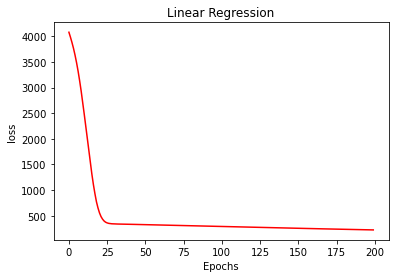

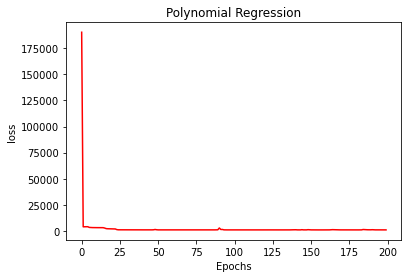

In [10]:
test.DisplayLoss()

### Displaying Predictions
Displaying the predictions from the Linear regression and polynomial regression models.

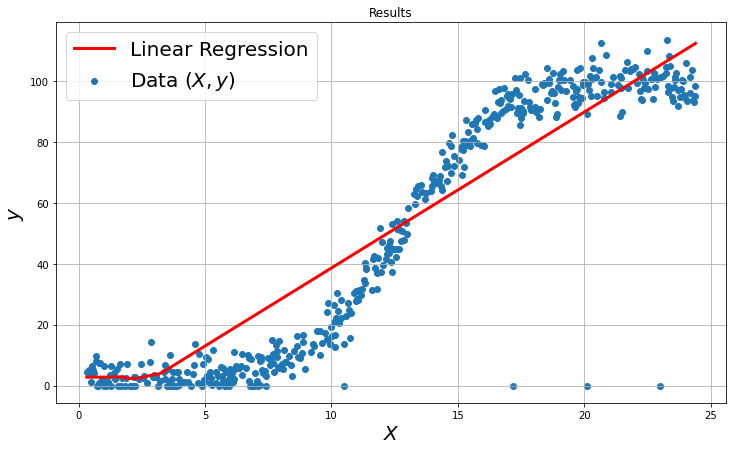

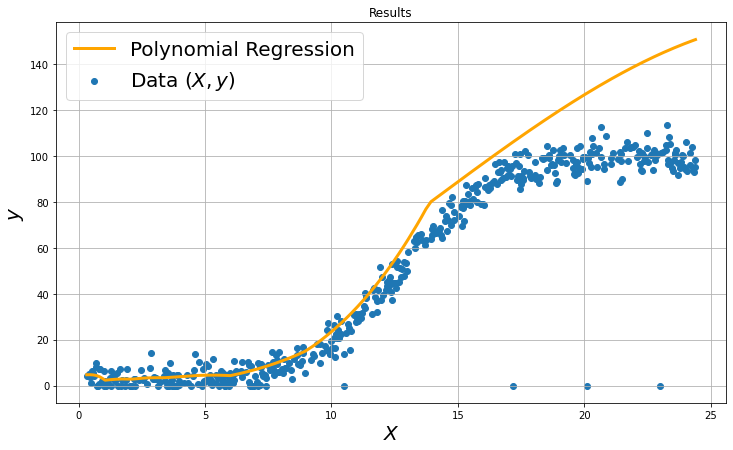

In [11]:
test.DisplayPredictions()